In [ ]:
import VMC_NQS_train as vmc
from VMC_NQS_train import *
import importlib
importlib.reload(vmc)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1: Energy = -5.932239, Loss = 0.034601
Epoch 2: Energy = -6.063481, Loss = 0.005996
Epoch 3: Energy = -6.074163, Loss = -0.032872
Epoch 4: Energy = -6.073951, Loss = -0.106661
Epoch 5: Energy = -6.131244, Loss = -0.200439
Epoch 6: Energy = -6.189728, Loss = -0.188706
Epoch 7: Energy = -6.225573, Loss = -0.245618
Epoch 8: Energy = -6.235789, Loss = -0.349010
Epoch 9: Energy = -6.299155, Loss = -0.351902
Epoch 10: Energy = -6.328923, Loss = -0.455904
Epoch 11: Energy = -6.362704, Loss = -0.450511
Epoch 12: Energy = -6.423646, Loss = -0.489267
Epoch 13: Energy = -6.418005, Loss = -0.501798
Epoch 14: Energy = -6.441451, Loss = -0.567994
Epoch 15: Energy = -6.496384, Loss = -0.628530
Epoch 16: Energy = -6.549491, Loss = -0.658845
Epoch 17: Energy = -6.593936, Loss = -0.783459
Epoch 18: Energy = -6.629539, Loss = -0.808945
Epoch 19: Energy = -6.669891, Loss = -0.811071
Epoch 20: Energy = -6.700884, Loss = -0.849085
Epoch 21: Energy = -6.716525, Loss = -0.924795
Epoch 22: Energy = -6.76

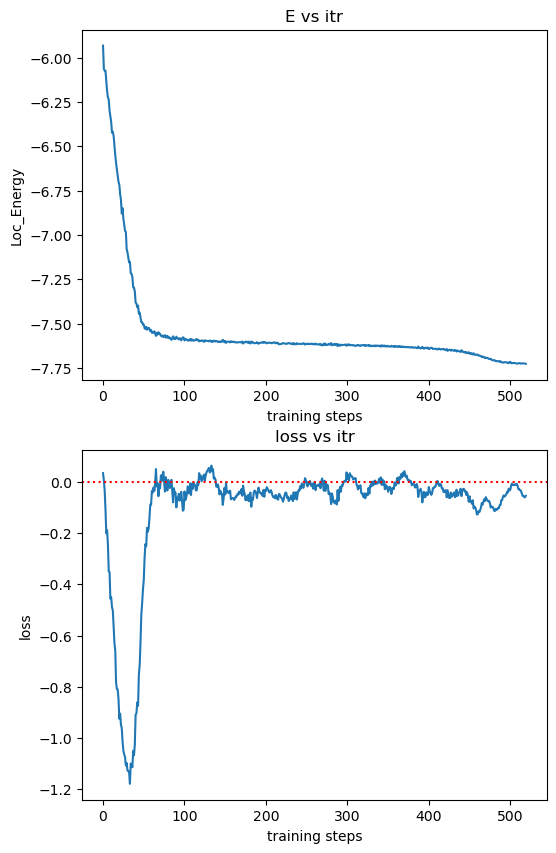

In [2]:
L = 6
J = 1.0
h = 1.0
nqs = keras.models.Sequential([
    layers.Input(shape=(L,1 )),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    
    layers.Dense(1, activation=None)
])
nqs.summary()


initial_config = np.ones((L,), dtype=np.float32)  # shape: (L,L)
initial_config.shape

J=1
h=1
epoch = 200
samples = 10000
steps = 250
lr = 1e-3
max_loops =16
loop_count = 0
E= None
Lss_val=None
optmizer=None
E,Lss_val, optmizer = vmc.run_training(num_epoch=epoch,init_config=initial_config,
                             n_samples=samples,met_steps=steps,
                             lr=lr,model=nqs,
                            J=J,h=h,optimizer=optmizer, E=E, lss_val= Lss_val 
                             
                            )

while np.abs(np.mean(E[-50:]) - np.mean(E[-100:-50]))>= 0.001 and loop_count < max_loops:
    epoch = 20
    samples = samples
    loop_count +=1
    if loop_count%3 ==0:
        steps = 2*steps
        lr = 0.1*lr
        
    
    E,Lss_val, optmizer = vmc.run_training(num_epoch=epoch,init_config=initial_config,
                             n_samples=samples,met_steps=steps,
                             lr=lr,model=nqs,
                            J=J,h=h,optimizer=optmizer, E=E, lss_val= Lss_val 
                             
                            )
    
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
plt.plot(range(len(E)),E)
plt.title('E vs itr')
plt.xlabel('training steps')
plt.ylabel('Loc_Energy')
#add gap in the two subplots
#plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,2)
plt.plot(range(len(Lss_val)),Lss_val)
plt.title('loss vs itr')
plt.xlabel('training steps')
plt.ylabel('loss')
plt.axhline(0,linestyle = ':', c= 'r')

plt.show()

In [9]:
nqs.optimizer = optmizer

In [3]:
L = 6
J = 1.0
h=0.001
nqs2 = keras.models.Sequential([
    layers.Input(shape=(L,1 )),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    
    layers.Dense(1, activation=None)
])
nqs2.summary()
#nqs2.optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

initial_config = np.ones((L,), dtype=np.float32)  # shape: (L,L)
initial_config.shape

epoch = 500
samples = 10000
steps = 250
lr = 1e-3
max_loops =16
loop_count = 0
E2= None
Lss_val2=None
optmizer2=None
E2,Lss_val2, optmizer2 = vmc.run_training(num_epoch=epoch,init_config=initial_config,
                             n_samples=samples,met_steps=steps,
                             lr=lr,model=nqs2,
                            J=J,h=h,optimizer=optmizer2, E=E2, lss_val= Lss_val2 
                             
                            )

while np.abs(np.mean(E[-50:]) - np.mean(E[-100:-50]))>= 0.001 and loop_count < max_loops:
    epoch = 20
    samples = samples
    loop_count +=1
    if loop_count%3 ==0:
        steps = 2*steps
        lr = 0.1*lr
        
    
    E2,Lss_val2, optmizer2 = vmc.run_training(num_epoch=epoch,init_config=initial_config,
                             n_samples=samples,met_steps=steps,
                             lr=lr,model=nqs2,
                            J=J,h=h,optimizer=optmizer2, E=E2, lss_val= Lss_val2 
                             
                            )
    
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
plt.plot(range(len(E2)),E2)
plt.title('E vs itr')
plt.xlabel('training steps')
plt.ylabel('Loc_Energy')
#add gap in the two subplots
#plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,2)
plt.plot(range(len(Lss_val2)),Lss_val2)
plt.title('loss vs itr')
plt.xlabel('training steps')
plt.ylabel('loss')
plt.axhline(0,linestyle = ':', c= 'r')

plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

ValueError: in user code:

    File "/home/n/N.Deshpande/my_folder/thesis/nqs_final/NQS_vmc.py", line 161, in vmc_training_step_tf  *
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    File "/software/opt/el_9/x86_64/python/3.12-2024.10/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py", line 344, in apply_gradients  **
        self.apply(grads, trainable_variables)
    File "/software/opt/el_9/x86_64/python/3.12-2024.10/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py", line 383, in apply
        self.build(trainable_variables)
    File "/software/opt/el_9/x86_64/python/3.12-2024.10/lib/python3.12/site-packages/keras/src/optimizers/adam.py", line 97, in build
        self.add_variable_from_reference(
    File "/software/opt/el_9/x86_64/python/3.12-2024.10/lib/python3.12/site-packages/keras/src/backend/tensorflow/optimizer.py", line 37, in add_variable_from_reference
        return super().add_variable_from_reference(
    File "/software/opt/el_9/x86_64/python/3.12-2024.10/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py", line 280, in add_variable_from_reference
        return self.add_variable(
    File "/software/opt/el_9/x86_64/python/3.12-2024.10/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py", line 254, in add_variable
        variable = backend.Variable(
    File "/software/opt/el_9/x86_64/python/3.12-2024.10/lib/python3.12/site-packages/keras/src/backend/common/variables.py", line 163, in __init__
        self._initialize_with_initializer(initializer)
    File "/software/opt/el_9/x86_64/python/3.12-2024.10/lib/python3.12/site-packages/keras/src/backend/tensorflow/core.py", line 40, in _initialize_with_initializer
        self._value = tf.Variable(

    ValueError: tf.function only supports singleton tf.Variables created on the first call. Make sure the tf.Variable is only created once or created outside tf.function. See https://www.tensorflow.org/guide/function#creating_tfvariables for more information.


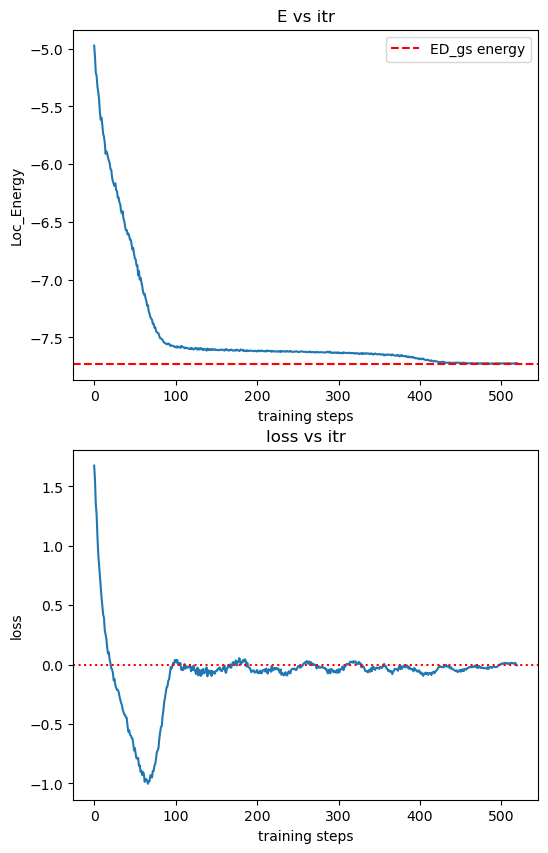

In [6]:
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
plt.plot(range(len(E)),E)
plt.title('E vs itr')
plt.xlabel('training steps')
plt.ylabel('Loc_Energy')
plt.axhline(-7.7274, linestyle='--',c = 'r', label = 'ED_gs energy')
plt.legend()
#add gap in the two subplots
#plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,2)
plt.plot(range(len(Lss_val)),Lss_val)
plt.title('loss vs itr')
plt.xlabel('training steps')
plt.ylabel('loss')
plt.axhline(0,linestyle = ':', c= 'r')

plt.show()